import pandas as pd
import numpy as np
import re
# from unidecode import unidecode
import spacy
from spacy.lang.en import English
from spacy import displacy
nlp = spacy.load('en_core_web_sm', disable=["ner", "textcat", "entity_ruler", "merge_noun_chunks", "merge_entities", "merge_subtokens"])

In [2]:
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [4]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)

In [5]:
pwd

'C:\\Users\\moha\\Documents\\vorlesung2019\\notebooks\\yeghaneh\\ml\\notebooks'

In [6]:
dfExoplanetsAbs=pd.read_json('../data/dfExoplanetsNASAabsClear_v1.json', orient = "table")
dfExoplanetsSent=pd.read_json('../data/dfE.json', orient = "table")

In [7]:
len(dfExoplanetsAbs)

31444

In [8]:
dfExoplanetsSent['annot']=dfExoplanetsSent.apply(lambda x: 0)
dfExoplanetsSent

,IDabstr,IDsentence,sentence,annot
0,0,0,A new GEANT4 particle transport model - the Atmospheric Radiation Interaction Simulator - has been recently developed in order to model the interaction of radiation with planets.,NaN
1,0,1,"The upcoming instrumentational advancements in the exoplanetary science, in particular transit spectroscopy capabilities of missions like JWST and E-ELT, have motivated the development of a particle transport code with a focus on providing the necessary fl...",NaN
2,0,2,for the modeling of radiation environment for exoplanets.,NaN
3,0,3,"Since there are no factors limiting the applicability of AtRIS to Mars and Venus, AtRIS' unique flexibility opens possibilities for new studies.",NaN
4,0,4,"Following the successful validation against Earth measurements, this work applies AtRIS with a specific implementation of the Martian atmospheric and regolith structure to model the radiation environment at Mars.",NaN
5,0,5,We benchmark these first modeling results based on different GEANT4 physics lists with the energetic particle spectra recently measured by the Radiation Assessment Detector (RAD) on the surface of Mars.,NaN
6,0,6,The good agreement between AtRIS and the actual measurement provides one of the first and sound validations of AtRIS and the preferred physics list which could be recommended for predicting the radiation field of other conceivable (exo)planets with an atmo...,NaN
7,1,0,"On the largest scales, planetary climates can be described by their Rossby number (Ro).",NaN
8,1,1,"Ro is in response to Gr/Re^(2), where Gr is the Grashof number and Re is the Reynolds number.",NaN
9,1,2,"We here simplify Gr/Re^(2) as h, where h = H /H_(Earth) with H = gP /(2 πV_(e)) for a planet with surface gravity g, rotation period P and equatorial velocity V_(e).",NaN


In [9]:
sentences=list(dfExoplanetsSent['sentence'])
len(sentences)

251386

# Classification

In [10]:
ClassifyAbst=[{"s":135232,"a":17198}]

# Dependency label
https://github.com/clir/clearnlp-guidelines/blob/master/md/specifications/dependency_labels.md

https://stackoverflow.com/questions/40288323/what-do-spacys-part-of-speech-and-dependency-tags-mean/40288324

https://nlp.stanford.edu/software/dependencies_manual.pdf

In [11]:
satz=nlp(sentences[114522])
satz

We analyzed the Kepler light curves of four transiting hot Jupiter systems—KOI-13, HAT-P-7, TrES-2, and Kepler-76, which show BEaming, Ellipsoidal, and Reflection (BEER) phase modulations.

displacy.render(satz, style="dep")

In [12]:
[(t.text,t.pos_,t.dep_,t.head.text,t.head.pos_,[c for c in t.children]) for t in satz]

[('We', 'PRON', 'nsubj', 'analyzed', 'VERB', []),
 ('analyzed', 'VERB', 'ROOT', 'analyzed', 'VERB', [We, curves, .]),
 ('the', 'DET', 'det', 'curves', 'NOUN', []),
 ('Kepler', 'PROPN', 'compound', 'curves', 'NOUN', []),
 ('light', 'NOUN', 'amod', 'curves', 'NOUN', []),
 ('curves', 'NOUN', 'dobj', 'analyzed', 'VERB', [the, Kepler, light, of]),
 ('of', 'ADP', 'prep', 'curves', 'NOUN', [systems]),
 ('four', 'NUM', 'nummod', 'systems', 'NOUN', []),
 ('transiting', 'VERB', 'amod', 'systems', 'NOUN', []),
 ('hot', 'ADJ', 'amod', 'Jupiter', 'PROPN', []),
 ('Jupiter', 'PROPN', 'compound', 'systems', 'NOUN', [hot]),
 ('systems',
  'NOUN',
  'pobj',
  'of',
  'ADP',
  [four, transiting, Jupiter, —, ,, ,, TrES-2, ,, show]),
 ('—', 'PUNCT', 'appos', 'systems', 'NOUN', []),
 ('KOI-13', 'PROPN', 'punct', ',', 'PUNCT', []),
 (',', 'PUNCT', 'punct', 'systems', 'NOUN', [KOI-13]),
 ('HAT', 'PROPN', 'compound', 'P-7', 'PROPN', []),
 ('-', 'PUNCT', 'punct', 'P-7', 'PROPN', []),
 ('P-7', 'PROPN', 'punct', 

In [13]:
def satz_analytic(satz):
#    merkmal = dict({"satz":satz.text})
    merkmal=dict({})
# search for main verb
    for t in satz:
        if t.dep_ == "ROOT":
            r=t.head.text
            merkmal.update({"act":r})
# subject and object related to verb
    for t in satz:
        if t.dep_ == "dobj" and merkmal["act"]==t.head.text:
            merkmal.update({"obj":''.join(w.text_with_ws for w in t.subtree)})
        if t.dep_ == "nsubj" and merkmal["act"]==t.head.text:
            merkmal.update({"subject":t.text.lower()})

    return(merkmal)
satz_analytic(satz)

{'act': 'analyzed',
 'subject': 'we',
 'obj': 'the Kepler light curves of four transiting hot Jupiter systems—KOI-13, HAT-P-7, TrES-2, and Kepler-76, which show BEaming, Ellipsoidal, and Reflection (BEER) phase modulations'}

In [14]:
df=pd.DataFrame(columns=['subject','act',"obj"])

#for i in range(len(sentences)):

for i in range(251386):
    s=sentences[i]
    p=satz_analytic(nlp(s))
    df=df.append(p,ignore_index=True)

In [15]:
df.to_pickle("EXO_Sentences_Discovery.pkl")

In [16]:
df=pd.read_pickle('../data/EXO_Sentences_Discovery.pkl')

In [18]:
df.head(20)

,subject,act,obj
0,NaN,developed,NaN
1,advancements,motivated,the development of a particle transport code
2,NaN,for,NaN
3,flexibility,opens,possibilities for new studies
4,work,applies,AtRIS
5,we,benchmark,these first modeling results based on different GEANT4 physics lists with the energetic particle spectra recently measured by the Radiation Assessment Detector (RAD) on the surface of Mars
6,agreement,provides,exo)planets with an atmospheric environment similar to Mars
7,NaN,described,NaN
8,number,is,NaN
9,we,simplify,Gr/Re^(2


In [19]:
dfs=df[df["subject"]=="we"]
dfs.head(4)

,subject,act,obj
5,we,benchmark,these first modeling results based on different GEANT4 physics lists with the energetic particle spectra recently measured by the Radiation Assessment Detector (RAD) on the surface of Mars
9,we,simplify,Gr/Re^(2
15,we,benchmark,these first modeling results based on different GEANT4 physics lists with the energetic particle spectra recently measured by the Radiation Assessment Detector (RAD) on the surface of Mars
19,we,simplify,Gr/Re^(2


In [20]:
len(dfs)

62498

In [21]:
dfAct=df.groupby(["subject","act"]).size().sort_values(ascending=False).reset_index()
dfAct[dfAct["subject"]=="we"]

,subject,act,0
0,we,present,7364
1,we,find,5105
2,we,show,2795
3,we,discuss,2154
4,we,report,2143
6,we,use,1801
7,we,propose,1408
8,we,describe,1378
9,we,investigate,1183
11,we,demonstrate,845


In [22]:
dfExoplanetsNASAannot = pd.read_json('../data/dfExoplanetsNASAdetected100rand_v2.json', orient = 'table')
del dfExoplanetsNASAannot['tagRootSent']
del dfExoplanetsNASAannot['tagDetected']
dfExoplanetsNASAannot.head(20)

,sent,label
0,"We detected visual companions within 1'' for 5 stars, between 1'' and 2'' for 7 stars, and between 2'' and 4'' for 15 stars.",discovery
1,"Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new...",discovery
2,"Of the over 800 exoplanets detected to date, over half are on non-circular orbits, with eccentricities as high as 0.93.",None
3,"We find that for these false positive scenarios, CO at 2.35 μm, CO_2 at 2.0 and 4.3 μm, and O_4 at 1.27 μm are all stronger features in transmission than O_2/O_3 and could be detected with S/Ns ≳ 3 for an Earth-size planet orbiting a nearby M dwarf star wi...",discovery
4,We present two exoplanets detected at Keck Observatory.,discovery
5,"This disfavours the possibility of GI-caused spiral structure in systems with q&lt;0.25 being detected in relatively short integration times, such as those found in the DSHARP ALMA survey (Andrews et al. 2018; Huang et al. 2018).",None
6,"Planets lying in this zone are then more easily detected with the radial-velocity method [3], the most successful in detecting exoplanets.",None
7,"The 2004 flux density was 0.05 Jy, about an order of magnitude lower than the single 2003 burst and the five bursts detected in 2002.",discovery
8,"This statement is supported by a figure given in the article, which shows a primary signal with a depth of 6 mmag, detected with 4σ confidence and a possible secondary signal with a depth of 2 mmag.",None
9,"Combining these instruments with powerful telescopes, astronomers have detected thousands of exoplanets.",None


In [23]:
def satz_analytic2(satz):
#    merkmal = dict({"satz":satz.text})
    merkmal=dict({})
# search for main verb
    for t in satz:
        if t.dep_ == "ROOT":
            r=t.head.text
            merkmal.update({"act":r})
# subject and object related to verb
    for t in satz:
#        if t.dep_ == "dobj" and merkmal["act"]==t.head.text:
#            merkmal.update({"obj":''.join(w.text_with_ws for w in t.subtree)})
        if t.dep_ == "nsubj" and merkmal["act"]==t.head.text:
            merkmal.update({"subject":t.text.lower()})

    return(merkmal)
satz_analytic(satz)

{'act': 'analyzed',
 'subject': 'we',
 'obj': 'the Kepler light curves of four transiting hot Jupiter systems—KOI-13, HAT-P-7, TrES-2, and Kepler-76, which show BEaming, Ellipsoidal, and Reflection (BEER) phase modulations'}

In [24]:
dfExoplanetsNASAannot["s"]=dfExoplanetsNASAannot["sent"].apply(lambda y: satz_analytic2(nlp(y)))
dfExoplanetsNASAannot.head(20)

,sent,label,s
0,"We detected visual companions within 1'' for 5 stars, between 1'' and 2'' for 7 stars, and between 2'' and 4'' for 15 stars.",discovery,"{'act': 'detected', 'subject': 'we'}"
1,"Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new...",discovery,"{'act': 'identified', 'subject': 'we'}"
2,"Of the over 800 exoplanets detected to date, over half are on non-circular orbits, with eccentricities as high as 0.93.",None,"{'act': 'are', 'subject': 'half'}"
3,"We find that for these false positive scenarios, CO at 2.35 μm, CO_2 at 2.0 and 4.3 μm, and O_4 at 1.27 μm are all stronger features in transmission than O_2/O_3 and could be detected with S/Ns ≳ 3 for an Earth-size planet orbiting a nearby M dwarf star wi...",discovery,"{'act': 'find', 'subject': 'we'}"
4,We present two exoplanets detected at Keck Observatory.,discovery,"{'act': 'present', 'subject': 'we'}"
5,"This disfavours the possibility of GI-caused spiral structure in systems with q&lt;0.25 being detected in relatively short integration times, such as those found in the DSHARP ALMA survey (Andrews et al. 2018; Huang et al. 2018).",None,{'act': 'al'}
6,"Planets lying in this zone are then more easily detected with the radial-velocity method [3], the most successful in detecting exoplanets.",None,{'act': 'detected'}
7,"The 2004 flux density was 0.05 Jy, about an order of magnitude lower than the single 2003 burst and the five bursts detected in 2002.",discovery,"{'act': 'was', 'subject': 'density'}"
8,"This statement is supported by a figure given in the article, which shows a primary signal with a depth of 6 mmag, detected with 4σ confidence and a possible secondary signal with a depth of 2 mmag.",None,{'act': 'supported'}
9,"Combining these instruments with powerful telescopes, astronomers have detected thousands of exoplanets.",None,"{'act': 'detected', 'subject': 'astronomers'}"


In [79]:
_all_xs=list(dfExoplanetsNASAannot["s"])


In [80]:
def transp(x):
    if x=="discovery":
        y=1
    else:
        y=0
    return(y)
dfExoplanetsNASAannot["label"]=dfExoplanetsNASAannot["label"].apply(lambda x: transp(x))

In [81]:
dfExoplanetsNASAannot.head(2)

,sent,label,s
0,"We detected visual companions within 1'' for 5 stars, between 1'' and 2'' for 7 stars, and between 2'' and 4'' for 15 stars.",1,"{'act': 'detected', 'subject': 'we'}"
1,"Using these data and photometry from the Spitzer Space Telescope, we have identified members with infrared excess emission from circumstellar disks and have estimated the evolutionary stages of the detected disks, which include 31 new full disks and 16 new...",1,"{'act': 'identified', 'subject': 'we'}"


In [82]:
_all_xs[1]

{'act': 'identified', 'subject': 'we'}

In [83]:
_all_ys=np.array(list(dfExoplanetsNASAannot["label"]))
_all_ys

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [84]:
from collections import Counter
Category=Counter(dfExoplanetsNASAannot["label"])
Counter=dict(Category)

In [85]:
Counter

{1: 40, 0: 60}

Text(0.5, 1.0, 'Distribution of samples over different classes')

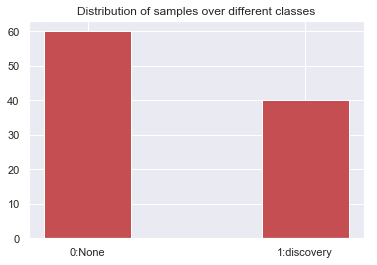

In [86]:
plt.bar(list(Counter.keys()),Counter.values(),color="r",width=.4,tick_label=["1:discovery","0:None"])
plt.title("Distribution of samples over different classes")


In [87]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
all_xs, all_ys = shuffle(_all_xs, _all_ys, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    all_xs, all_ys, test_size=0.25, random_state=0)


In [88]:
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

clf = XGBClassifier()
vec = DictVectorizer()
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
    scores = cross_val_score(_clf, all_xs, all_ys, scoring='accuracy', cv=10)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _clf.fit(X_train, y_train)  # so that parts of the original pipeline are fitted
    
evaluate(pipeline)

Accuracy: 0.660 ± 0.183


In [89]:
y_pred=pipeline.predict(X_test)

# Evaluation

## 1-Holdout Method

## Accuracy

In [90]:
score=pipeline.score(X_test,y_test)
print("The accuracy is {}".format(score))

The accuracy is 0.68


In [91]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, y_pred)


## Confusion Matrix 

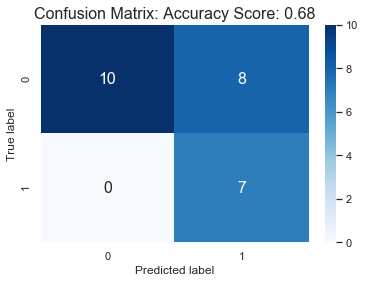

In [92]:
l=len(set(all_ys))
df_cm = pd.DataFrame(cm, range(l), range(l))
sns.set(font_scale=1)
sns.heatmap(df_cm,cmap="Blues", annot=True,annot_kws={"size": 16})
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix: Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 16)
plt.savefig('CM_Test_01.png')

## Classification Report

In [93]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.56      0.71        18
           1       0.47      1.00      0.64         7

   micro avg       0.68      0.68      0.68        25
   macro avg       0.73      0.78      0.68        25
weighted avg       0.85      0.68      0.69        25



In [94]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1])

## ROC Curve and AUC

In [95]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
def plot_roc_curve(fpr, tpr,auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve with AUC {:.3f}'.format(AUC))
    plt.legend()
    plt.show()

In [96]:
AUC = roc_auc_score(y_test,y_pred)  


In [97]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)  

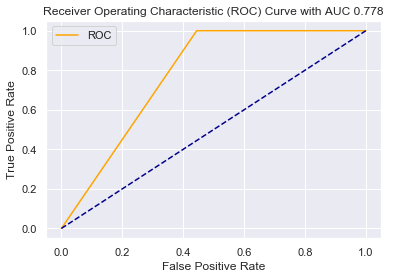

In [98]:
plot_roc_curve(fpr,tpr,AUC)

In [99]:
booster = clf.get_booster()
original_feature_names = booster.feature_names
booster.feature_names = vec.get_feature_names()
print(booster.get_dump()[0])
# recover original feature names
booster.feature_names = original_feature_names

0:[subject=we<-9.53674316e-07] yes=1,no=2,missing=1
	1:[act=detected<-9.53674316e-07] yes=3,no=4,missing=3
		3:leaf=-0.0857142881
		4:leaf=0.0105263162
	2:[act=detected<-9.53674316e-07] yes=5,no=6,missing=5
		5:leaf=0.0200000014
		6:leaf=0.120000005



In [63]:
from eli5 import show_weights
show_weights(clf, vec=vec)

Weight,Feature
0.6265,subject=we
0.3735,act=detected
0,act=reconstruct
0,act=provokes
0,act=present
0,act=performed
0,act=pattern
0,act=measure
0,act=is
0,act=infers


In [65]:
@interact
def show_abstracts(x=(1,29000,1)):
    df=dfExoplanetsSent.loc[dfExoplanetsSent["IDabstr"] == x]
    return(df)

,IDabstr,IDsentence,sentence,annot
114522,14500,0,"We analyzed the Kepler light curves of four transiting hot Jupiter systems—KOI-13, HAT-P-7, TrES-2, and Kepler-76, which show BEaming, Ellipsoidal, and Reflection (BEER) phase modulations.",NaN
114523,14500,1,"The mass of the four planets can be estimated from either the beaming or the ellipsoidal amplitude, given the mass and radius of their parent stars.",NaN
114524,14500,2,"For KOI-13, HAT-P-7, and Kepler-76 we find that the beaming-based planetary mass estimate is larger than the mass estimated from the ellipsoidal amplitude, consistent with previous studies.",NaN
114525,14500,3,"This apparent discrepancy may be explained by equatorial superrotation of the planet atmosphere, which induces an angle shift of the planet reflection/emission phase modulation, as was suggested for Kepler-76 in the first paper of this series.",NaN
114526,14500,4,"We propose a modified BEER model that supports superrotation, assuming either a Lambertian or geometric reflection/emission phase function, and provides a photometry-consistent estimate of the planetary mass.",NaN
114527,14500,5,"Our analysis shows that for Kepler-76 and HAT-P-7, the Lambertian superrotation BEER model is highly preferable over an unshifted null model, while for KOI-13 it is preferable only at a 1.4σ level.",NaN
114528,14500,6,For TrES-2 we do not find such preference.,NaN
114529,14500,7,"For all four systems the Lambertian superrotation model mass estimates are in excellent agreement with the planetary masses derived from, or constrained by, radial velocity measurements.",NaN
114530,14500,8,This makes the Lambertian superrotation BEER model a viable tool for estimating the masses of hot Jupiters from photometry alone.,NaN
114531,14500,9,We conclude that hot Jupiter superrotation may be a common phenomenon that can be detected in the visual light curves of Kepler.,NaN
